In [ ]:
import tensorflow as tf
from tensorflow import keras 
import numpy as np
import matplotlib.pyplot as plt
#import cv2 as cv 

**Preprocessing and splitting** 

In [9]:
#try to load the data 
data  = keras.datasets.mnist
# training section       #testing section
(x_train , y_train) , (x_test, y_test) = data.load_data()

In [10]:
print (f'the x_train shape , y_train shape :  {x_train.shape ,y_train.shape}')

the x_train shape , y_train shape :  ((60000, 28, 28), (60000,))


**Normalizing pixles**

In [11]:
#Normalize the data from 0->255 into 0->1
x_train  = x_train/255.0 #do not forget to make it float 
x_test = x_test/255.0

"\nimport cv2\nfor i in range(6):\n    cv2.imshow(f'Image {i}', x_train[i])  # Opens 6 separate windows\n    cv2.waitKey(0)  # Press any key to close each window\ncv2.destroyAllWindows()"

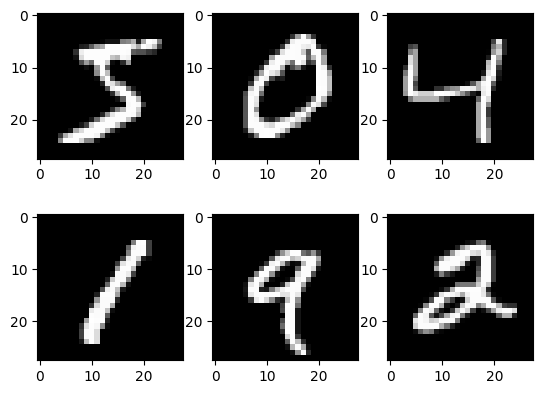

In [25]:
for i in range (6):
  plt.subplot(2 , 3 , i+1)
  plt.imshow(x_train[i] ,cmap='grey')
#plt.show() can be put or removed only in jupyter but in python script it is a must 

#why can't we use open cv ? cv2.imshow() ? it will shows the result one after another 
#and w a wait key between images so it will be like this and there is no a subplots in openCV
'''
import cv2
for i in range(6):
    cv2.imshow(f'Image {i}', x_train[i])  # Opens 6 separate windows
    cv2.waitKey(0)  # Press any key to close each window
cv2.destroyAllWindows()'''

**Model**

In [31]:
#pass a list with all the diff layers 
#.dense means = fully connected layer 
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape = (28 ,28)),
    keras.layers.Dense(128 , activation='relu'),
    keras.layers.Dense(10)
    #keras.layers.softamx as we need a probabilities for the 10 classes 
    #but it is preffered to be included in the loss phase
])

model.summary()

c:\Users\moham\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
help(keras.layers.Dense)

Help on class Dense in module keras.src.layers.core.dense:

class Dense(keras.src.layers.layer.Layer)
 |  Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None, lora_rank=None, **kwargs)
 |
 |  Just your regular densely-connected NN layer.
 |
 |  `Dense` implements the operation:
 |  `output = activation(dot(input, kernel) + bias)`
 |  where `activation` is the element-wise activation function
 |  passed as the `activation` argument, `kernel` is a weights matrix
 |  created by the layer, and `bias` is a bias vector created by the layer
 |  (only applicable if `use_bias` is `True`).
 |
 |  Note: If the input to the layer has a rank greater than 2, `Dense`
 |  computes the dot product between the `inputs` and the `kernel` along the
 |  last axis of the `inputs` and axis 0 of the `kernel` (using `tf.tensordot`).
 |  F

**Another way of sequential model**

In [33]:
#the adv is it enables you to make a model.summary() after each layer 
model2 = keras.Sequential()
model2.add(keras.layers.Flatten(input_shape = (28 ,28)))
#model2.summary()
model2.add(keras.layers.Dense(128 , activation='relu'))
#model2.summary()
model2.add(keras.layers.Dense(10))
#model2.summary()

c:\Users\moham\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


**Loss and optemizer**

In [36]:
# if the y = 0 or 1 or 2 or 3 lables = indecies -> sparsecategoricalcrossentropy()
#if y = oneHot -> y = [1 for the class and zeros for the rest]
# ex y = [1 ,0 , 0, 0 ,0] so -> CategoricalCrossEntropy()only
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
#from logites = True bec we didn't put the softmax act function in the output layer yet
optimizerr = keras.optimizers.Adam(learning_rate= 0.01)
metric = ['accuracy']
model.compile(loss= loss , optimizer= optimizerr , metrics = metric)

#what is the diff between :
#1-.SparseCategoricalCrossentropy() used in the validation while training and before testing
#2-.sparse_categorical_crossentropy()used in the evaluation after training and while testing

**Training**

In [39]:
#to get the best training divide the batches and detect the number of epoches 
batches = 64 
no_epoches = 5
model.fit(x_train , y_train , batch_size= batches , epochs=no_epoches , verbose=2, shuffle=True)

Epoch 1/5
938/938 - 3s - 3ms/step - accuracy: 0.9330 - loss: 0.2207
Epoch 2/5
938/938 - 2s - 2ms/step - accuracy: 0.9617 - loss: 0.1304
Epoch 3/5
938/938 - 2s - 2ms/step - accuracy: 0.9688 - loss: 0.1092
Epoch 4/5
938/938 - 2s - 2ms/step - accuracy: 0.9707 - loss: 0.1036
Epoch 5/5
938/938 - 2s - 2ms/step - accuracy: 0.9748 - loss: 0.0910


**Evaluate the model**

In [41]:
model.evaluate(x_test , y_test , batch_size=batches , verbose=2)

157/157 - 0s - 1ms/step - accuracy: 0.9715 - loss: 0.1293


[0.12930181622505188, 0.9714999794960022]

Remember we didn't make the softmax in the layers instead w put it while training and now we want to make **Predictions** so we need it

In [42]:
probability_model = keras.models.Sequential([
   model , #now it has all the layers in the original(first) model
   keras.layers.Softmax()
])


predictions = probability_model(x_test)
pred0 = predictions[0]
print (pred0)
label0 = np.argmax(pred0)
print (label0)

tf.Tensor(
[1.3053491e-18 1.2329013e-14 2.1332693e-12 2.3264775e-10 3.1730135e-16
 5.7600934e-15 2.6237464e-31 1.0000000e+00 1.3117997e-16 2.4126529e-13], shape=(10,), dtype=float32)
7
